## **Analyze** Synthetic

**Required Imports**

In [12]:
import sys

import matplotlib
import numpy as np
import pandas as pd

sys.path.append('../../')
import src

**Load Results**

In [27]:
filepath = "../../results/synthetic"
filename = "2025-07-24_synthetic_duration-19379_samples-100"

In [14]:
metadata = pd.read_parquet(f"{filepath}/{filename}_metadata.parquet")
metrics = pd.read_parquet(f"{filepath}/{filename}_metrics.parquet")
distributions = pd.read_parquet(f"{filepath}/{filename}_distributions.parquet")
locations = np.load(f"{filepath}/{filename}_locations.npz")

In [15]:
dataframe = metadata.merge(metrics, on=["unique_id"], how="left")

**Compute Metrics**

In [16]:
dataframe = src.data.proportion_of_dropped_edges(dataframe=dataframe)
dataframe = src.data.number_of_overlap_edges_to_number_of_net1_edges(dataframe=dataframe)
dataframe = src.data.number_of_overlap_edges_to_number_of_net2_edges(dataframe=dataframe)
dataframe = src.data.normalized_global_jaccard(dataframe=dataframe)

In [17]:
distributions = src.data.joint_deg_mean_number_of_overlap_edges(dataframe=distributions)
distributions = src.data.joint_deg_mean_number_of_overlap_edges_to_number_of_net1_edges(dataframe=distributions)
distributions = src.data.joint_deg_mean_number_of_overlap_edges_to_number_of_net2_edges(dataframe=distributions)
distributions = src.data.joint_deg_mean_normalized_local_jaccard(dataframe=distributions)

**Set Colors**

In [18]:
blues = matplotlib.colormaps.get_cmap("Blues")
oranges = matplotlib.colormaps.get_cmap("Oranges")

cms_color = matplotlib.colors.to_hex(oranges(0.50))
sdc_color = matplotlib.colors.to_hex(blues(0.50))
sdcdp_color = matplotlib.colors.to_hex(blues(1.00))
palette = {"CMS": cms_color, "SDC": sdc_color, "SDC-DP": sdcdp_color}

midpoint = matplotlib.colors.to_hex(blues(0.75))
cropped = matplotlib.colors.ListedColormap(blues(np.linspace(0.50, 1.00, 1024)), name="Cropped")

**Plot SDA Connection Probability by Distance**

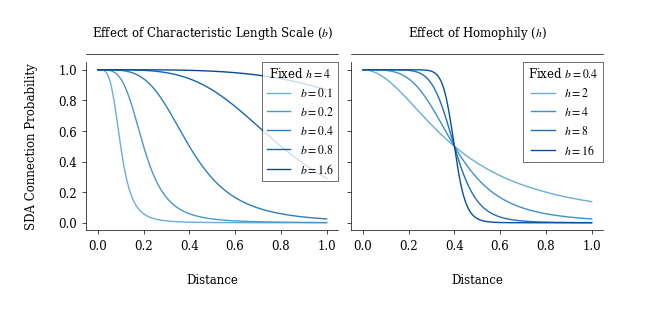

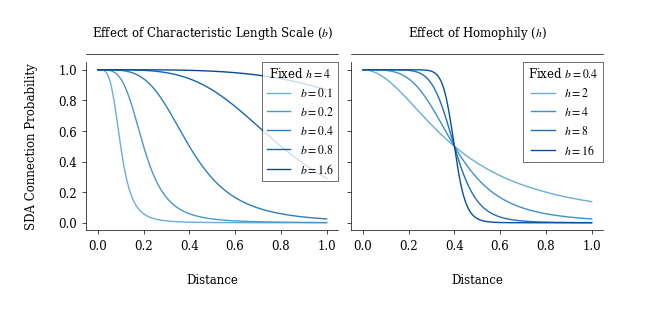

In [19]:
b_vals = [0.1, 0.2, 0.4, 0.8, 1.6]
h_vals = [2, 4, 8, 16]
fixed_b = 0.4
fixed_h = 4

fig1 = src.plots.plot_sda_probability_by_distance(b_vals, h_vals, fixed_b, fixed_h, colormap=cropped)

display(fig1)

**Plot Locations**

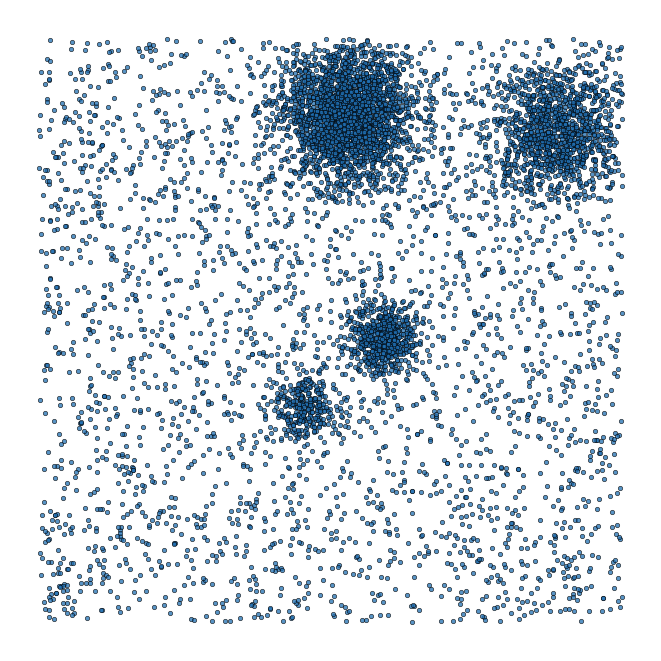

In [20]:
loc = locations["net_size_7500"]

fig2 = src.plots.plot_synthetic_locations(loc, color=midpoint)

display(fig2)

**Plot Degree Distributions**

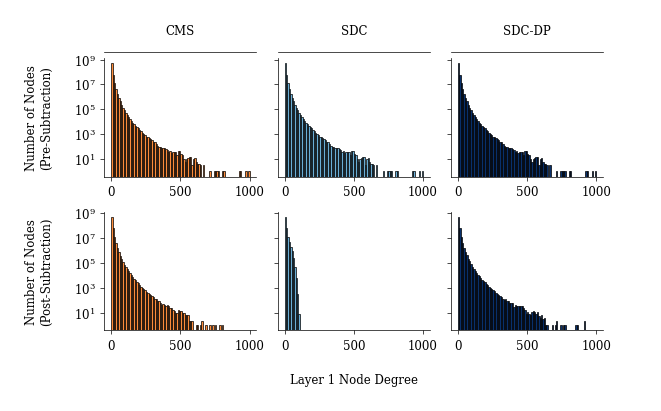

In [21]:
params = [
    {"rows": ["joint_deg_number_of_nodes_pre", "joint_deg_number_of_nodes_post"], "repeat": True},
    # {"rows": ["joint_deg_number_of_nodes_pre", "joint_deg_number_of_nodes_post"], "repeat": True}
]

labels = [
    {"rows": ["Number of Nodes\n(Pre-Subtraction)", "Number of Nodes\n(Post-Subtraction)"], "columns": "Layer 1 Node Degree"},
    # {"rows": ["Number of Nodes\n(Pre-Subtraction)", "Number of Nodes\n(Post-Subtraction)"], "columns": "Layer 2 Node Degree"}
]

binsizes = [
    10,
    # 10
]

binby = [
    "deg1",
    # "deg2"
]

fig3 = src.plots.plot_joint_degree_distributions(distributions, params, labels, binsizes, binby, refine=None, log=True, density=False, palette=palette)

display(fig3)

**Plot Proportion of Dropped Edges**

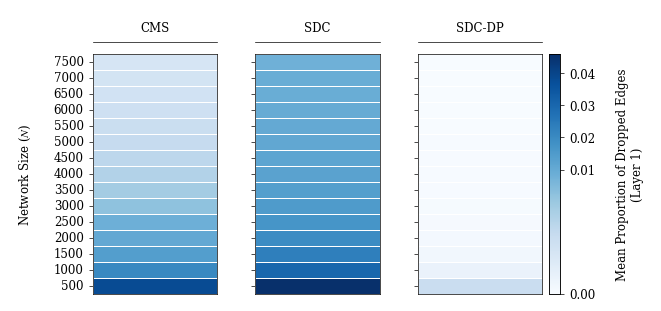

In [22]:
params = [
    {"rows": "net_size", "columns": "model_id", "value": "proportion_of_net1_dropped_edges"},
    # {"rows": "net_size", "columns": "model_id", "value": "proportion_of_net2_dropped_edges"}
]

labels = [
    {"rows": r"Network Size ($N$)", "columns": "", "value": "Mean Proportion of Dropped Edges\n(Layer 1)"},
    # {"rows": r"Network Size ($N$)", "columns": "", "value": "Mean Proportion of Dropped Edges\n(Layer 2)"}
]

fig4 = src.plots.plot_global_metrics(dataframe, params, labels, refine=None, aggfunc="mean", colormap=blues)

display(fig4)

**Plot Global Overlap**

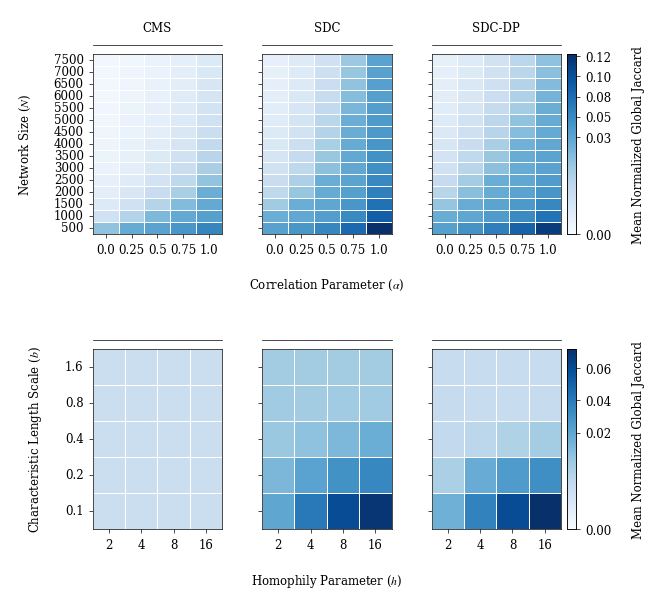

In [23]:
params = [
    {"rows": "net_size", "columns": "deg_seq_corr", "value": "normalized_global_jaccard"},
    {"rows": "char_dist", "columns": "homophily", "value": "normalized_global_jaccard"}
]

labels = [
    {"rows": r"Network Size ($N$)", "columns": r"Correlation Parameter ($\alpha$)", "value": "Mean Normalized Global Jaccard"},
    {"rows": r"Characteristic Length Scale ($b$)", "columns": r"Homophily Parameter ($h$)", "value": "Mean Normalized Global Jaccard"}
]

fig5 = src.plots.plot_global_metrics(dataframe, params, labels, refine=None, aggfunc="mean", colormap=blues)

display(fig5)

**Plot Local Overlap**

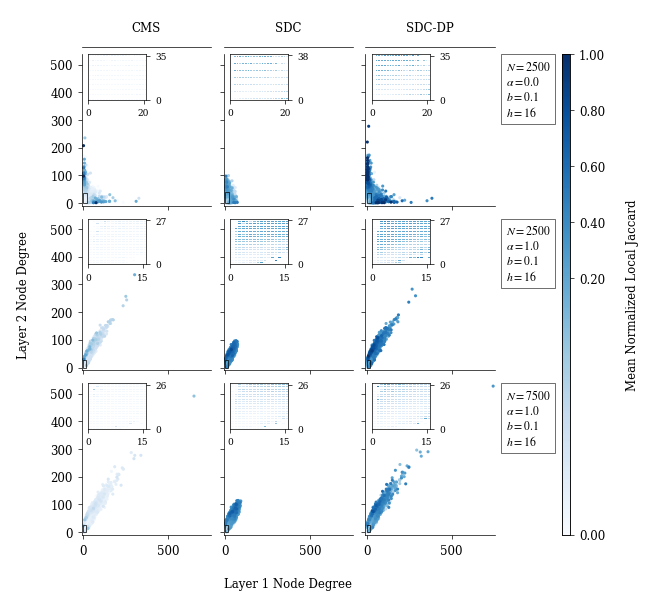

In [24]:
uid1 = src.data.get_unique_ids(metadata, net_size=2500, deg_seq_corr=0.00, char_dist=0.1, homophily=16)[0]
uid2 = src.data.get_unique_ids(metadata, net_size=2500, deg_seq_corr=1.00, char_dist=0.1, homophily=16)[0]
uid3 = src.data.get_unique_ids(metadata, net_size=7500, deg_seq_corr=1.00, char_dist=0.1, homophily=16)[0]

params = [
    {"unique_id": uid1, "legend": (2500, 0.00, 0.1, 16)},
    {"unique_id": uid2, "legend": (2500, 1.00, 0.1, 16)},
    {"unique_id": uid3, "legend": (7500, 1.00, 0.1, 16)}
]

labels = {
    "rows": "Layer 2 Node Degree",
    "columns": "Layer 1 Node Degree",
    "value": "Mean Normalized Local Jaccard"
}

mode = "joint_deg_mean_normalized_local_jaccard"

fig6 = src.plots.plot_local_metrics(distributions, params, labels, mode, threshold=0.90, degs=("deg1", "deg2"), colormap=blues)

display(fig6)

**Save Plots**

In [ ]:
fig1.savefig(f"{filepath}/plots/sda_connection_probability_by_distance_synthetic.pdf", format="pdf", dpi=300)
fig2.savefig(f"{filepath}/plots/locations_synthetic.pdf", format="pdf", dpi=300)
fig3.savefig(f"{filepath}/plots/degree_distributions_synthetic.pdf", format="pdf", dpi=300)
fig4.savefig(f"{filepath}/plots/proportion_of_dropped_edges_synthetic.pdf", format="pdf", dpi=300)
fig5.savefig(f"{filepath}/plots/global_overlap_synthetic.pdf", format="pdf", dpi=300)
fig6.savefig(f"{filepath}/plots/local_overlap_synthetic.pdf", format="pdf", dpi=300)